In [2]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from scipy.optimize import minimize
from scipy import stats
from scipy.stats import powerlognorm
from scipy.stats import lognorm
from scipy.stats import beta
from scipy.stats import gamma
#from scipy.stats import powerlaw
from scipy.stats import chi2
from scipy.stats import genpareto
from scipy.stats import expon
from scipy.stats import truncnorm
from scipy.stats import norm
from scipy.stats import gengamma
import random
from random import choices
import pdb
import matplotlib.pyplot as plt

In [3]:
def fitness_GGD_fit(pars):
    a = pars[0]
    c = pars[1]
    l = pars[3]
    alpha = pars[2]

    yPred =(1/(x))*gengamma.pdf(np.log(x),a=a, c=c,  loc = l, scale=alpha)
    #yPred =gengamma.pdf(np.log(x),a=a, c=c,  loc = -l, scale=alpha)
    LL = -np.sum( stats.norm.logpdf(yPred*tot, loc=y*tot, scale=np.sqrt(tot*y*(1-y)) ) )
    #sd = pars[4]
    #LL = -np.sum(stats.norm.logpdf(yPred, loc=y, scale= sd ) )
    return(LL)

def GGD_fit(pars):
    a = pars[0]
    c = pars[1]
    l = pars[3]
    alpha = pars[2]
    yPred =(1/(x))*gengamma.pdf(np.log(x),a=a, c=c, loc = l, scale=alpha)
    #yPred =gengamma.pdf(np.log(x),a=a, c=c,  loc = -l, scale=alpha)
    return(yPred)

In [4]:
data_counts = pd.read_pickle('Covid_counts_de.pkl')

data_counts['Count'].to_pickle('Covid_counts_de2.pkl')

size_distribution = data_counts.groupby('Count')['Count'].count()
size_distribution.head()
tot = size_distribution.sum()


x = np.array(size_distribution.index)
y = np.array(size_distribution/len(data_counts))
y_or = np.array(size_distribution)

In [5]:
GGD_init = [0.15 , 1.2 , 1.64 , -0.07]
#GGD_init = [2.45, 0.52 , 0.39 ,0.07]

init_pars = GGD_init
results_GGD = minimize(fitness_GGD_fit, init_pars, method='Nelder-Mead', options={'maxiter': 10000})
sim_g = GGD_fit(results_GGD.x)
rg=r2_score(y, sim_g)
print(rg)
print(results_GGD)

0.9999983360749958
 final_simplex: (array([[ 0.26289013,  1.27634194,  1.64607929, -0.22950534],
       [ 0.26288135,  1.27637278,  1.6461055 , -0.22950377],
       [ 0.26291131,  1.27629377,  1.64598504, -0.22951261],
       [ 0.26288013,  1.2763602 ,  1.64610088, -0.22950253],
       [ 0.26288349,  1.27634711,  1.64609828, -0.22950158]]), array([2670.9069133 , 2670.90696373, 2670.90697034, 2670.90697197,
       2670.90697471]))
           fun: 2670.906913300369
       message: 'Optimization terminated successfully.'
          nfev: 691
           nit: 408
        status: 0
       success: True
             x: array([ 0.26289013,  1.27634194,  1.64607929, -0.22950534])


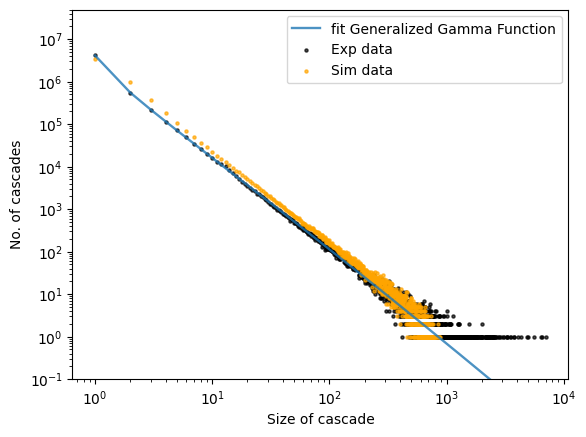

In [8]:
#SIMULATION DATA
#data1 = pd.read_csv(f'sim_v12_{x}_{y}_{w}_{z}.txt', sep=" ", header=None)
data1 = pd.read_csv(f'sim_memes_v13_203.txt', sep=" ", header=None)
data1.columns = ["iter", "size", "a_i", "d"]
counter1 = Counter(data1['size'])
sizes1 = np.array(list(counter1.keys()))
counts1 = np.array(list(counter1.values()))
max_val = max(counts1)
counts_norm1 = counts1/max_val

#ANALYTICAL DATA
plt.plot(x, sim_g*tot, '-', linewidth=1.7, alpha=0.8, label='fit Generalized Gamma Function')


#EXPERIMENTAL DATA
data_counts = pd.read_pickle('Covid_counts_de.pkl')
data_counts['Count'].to_pickle('Covid_counts_de2.pkl')
size_distribution = data_counts.groupby('Count')['Count'].count()
xr = np.array(size_distribution.index)
yr = np.array(size_distribution)
plt.scatter(xr, yr, color="black", alpha = 0.7, s=5, label = 'Exp data')
plt.scatter(sizes1,counts1, color="orange",alpha = 0.7, s=5, label = 'Sim data')


#AESTHETIC CHANGES
plt.legend(scatterpoints=1, loc='upper right')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Size of cascade")
plt.ylabel("No. of cascades")
#plt.savefig("sim_v6_3.png")
plt.ylim([0.1, 50e6])
plt.show()